In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

## Análise Preliminar

In [ ]:
dfClientes.sample(5) # dados aleatórios

,id,nome,sexo,dt_nasc
762,763,Manuela Gomes,F,6/29/1961
852,853,Otávio Barros,M,7/2/1972
778,779,Larissa Ferreira,F,12/31/1991
98,99,André Souza,M,1/24/1974
576,577,Eduardo Alves,M,1/1/1961


In [ ]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [ ]:
dfClientes[dfClientes.isnull().T.any()] # igual ao !complete.cases() do R

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [ ]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


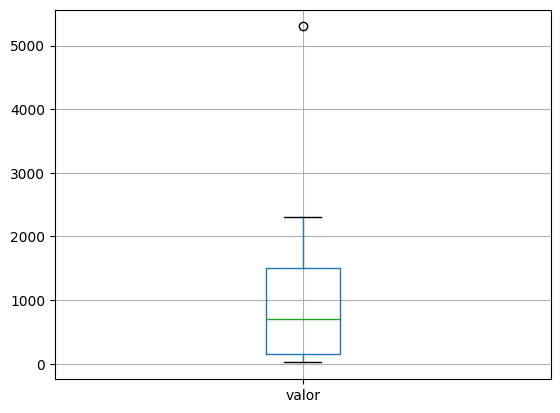

In [ ]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column= ['valor'])
plt.show()

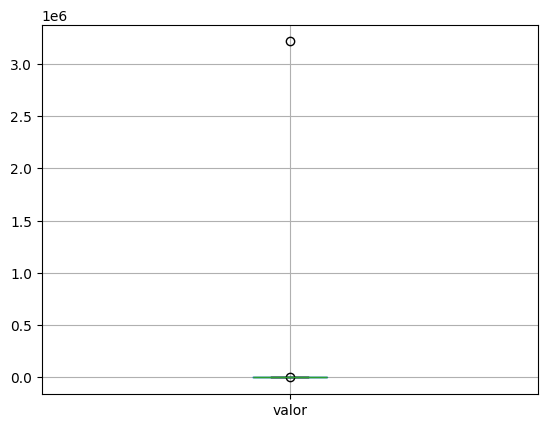

In [ ]:
dfProdutos.boxplot(column=['valor'])
plt.show()

In [ ]:
dfVendas[dfVendas.id_produto == 10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [ ]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [ ]:
dfPagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [ ]:
dfPagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


## Data Cleaning

In [ ]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '05/14/2024'

In [ ]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [ ]:
dfProdutos.loc[9, 'valor'] = (dfProdutos.valor[9]/10000).copy()
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


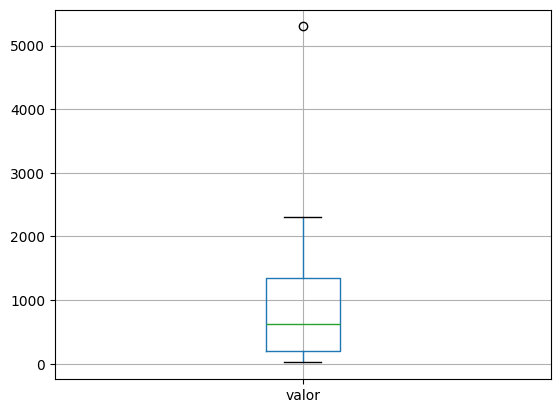

In [ ]:
dfProdutos.boxplot(column=['valor'])
plt.show()

## Consistência

In [ ]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)] # ~ negação

,id,id_cliente,id_loja,id_produto,dt_venda


In [ ]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [ ]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [ ]:
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Duplicados


In [ ]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [ ]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [ ]:
dfVendas[(dfVendas.id_loja == 2) & (dfVendas.id_cliente == 559) & (dfVendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


## Formato de dados


In [ ]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Index

In [ ]:
dfClientes = dfClientes.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [ ]:
dfClientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)

In [ ]:
dfLojas = dfLojas.set_index('id')
dfPagamentos= dfPagamentos.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')

## Data Fusion

In [ ]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on= 'id_cliente') # juntando a tabela com id_cliente sendo a chave primária
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')


In [ ]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [ ]:
df = df.join(dfPagamentos.set_index('id_venda'))

In [ ]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

## Feature Engeneering

In [ ]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [ ]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [ ]:
df['cliente_idade']= np.floor(((pd.to_datetime('today') - df.cliente_dt_nasc).dt.days) / 365)
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


# Análise

## Lojas e Produtos que mais vendem

In [ ]:
graf_dados = df.groupby('loja_cidade')['produto_valor'].count().sort_values(ascending= False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

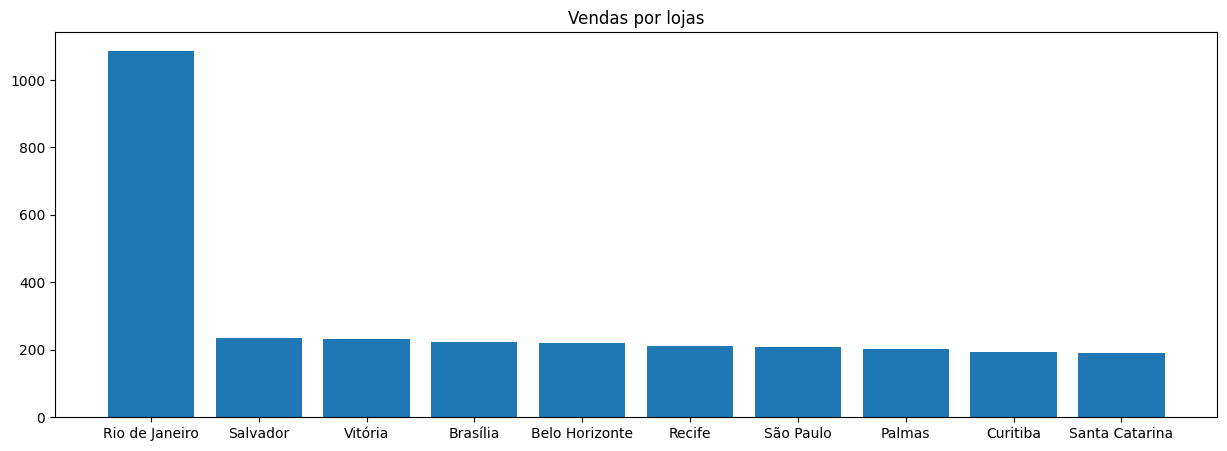

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por lojas')
plt.show()

In [ ]:
graf_dados = df.groupby('produto_produto')['produto_valor'].count().sort_values(ascending= False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

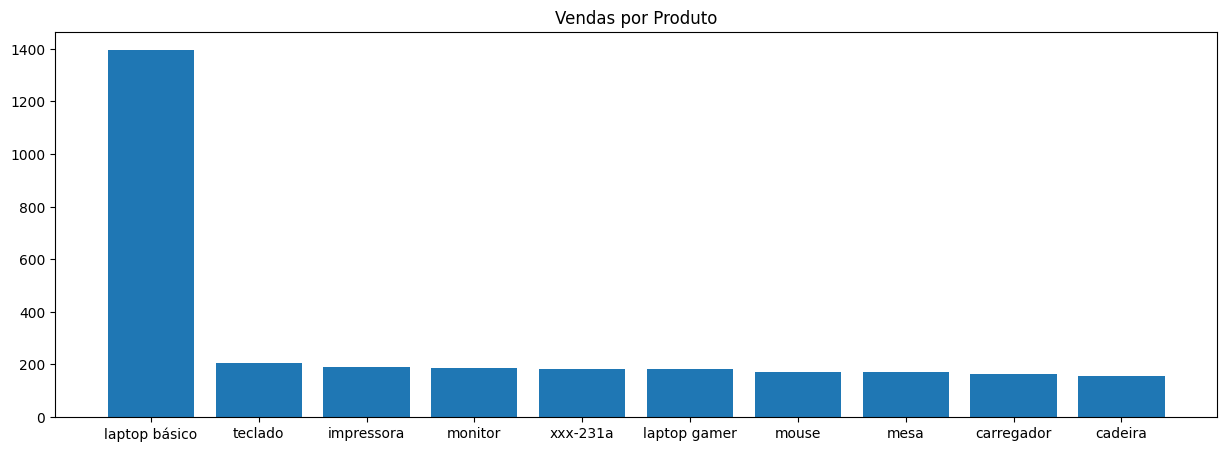

In [ ]:
plt.figure(figsize= (15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produto')
plt.show()

## Receita por Loja

In [ ]:
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending= False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

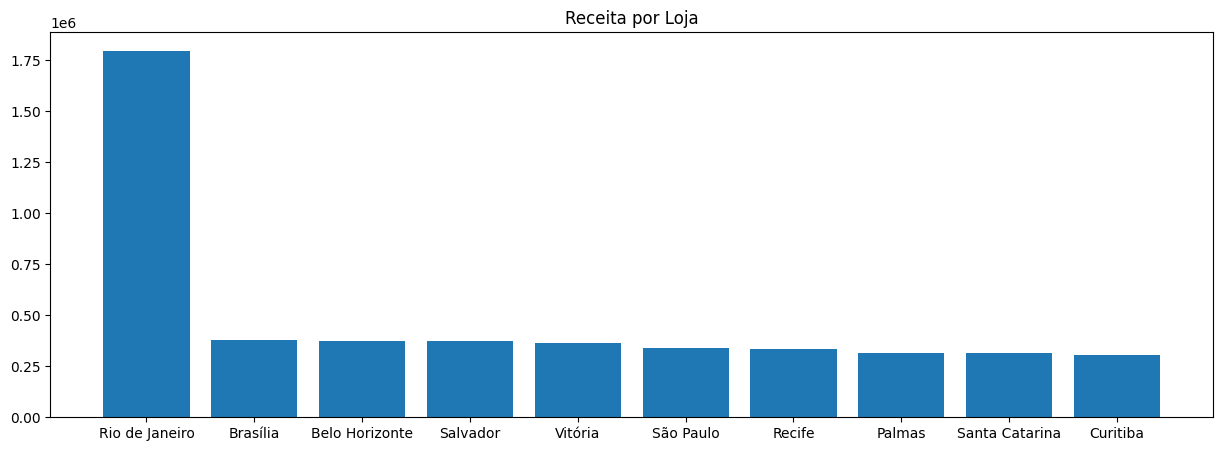

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.show()

In [ ]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max() / graf_dados[graf_dados != graf_dados.max()].mean(), graf_dados[graf_dados != graf_dados.max()].mean()))
graf_dados.max() / graf_dados[graf_dados != graf_dados.max()].mean()

O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


5.217004250545965

## Receita por Produto

In [ ]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

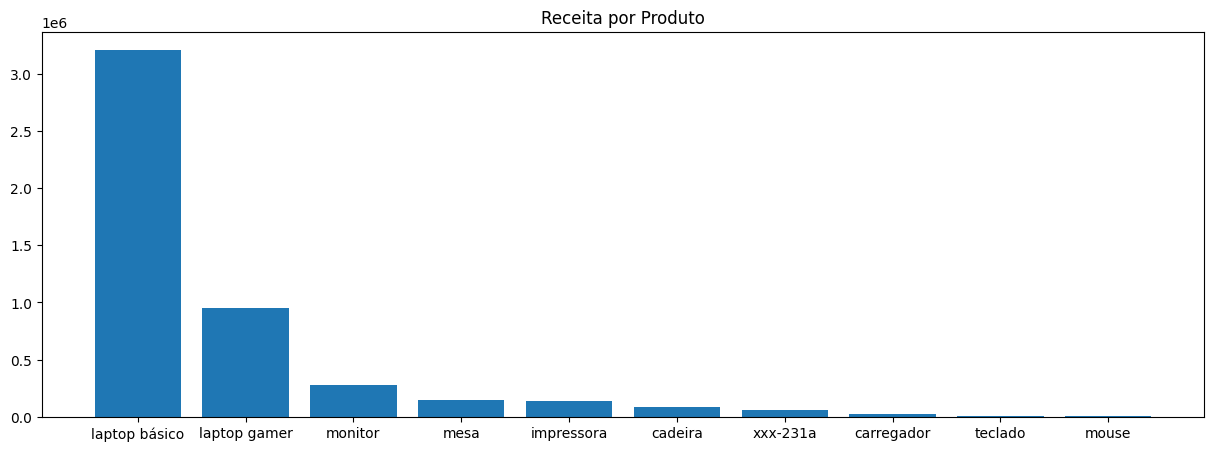

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Produto')
plt.show()

## Subplots

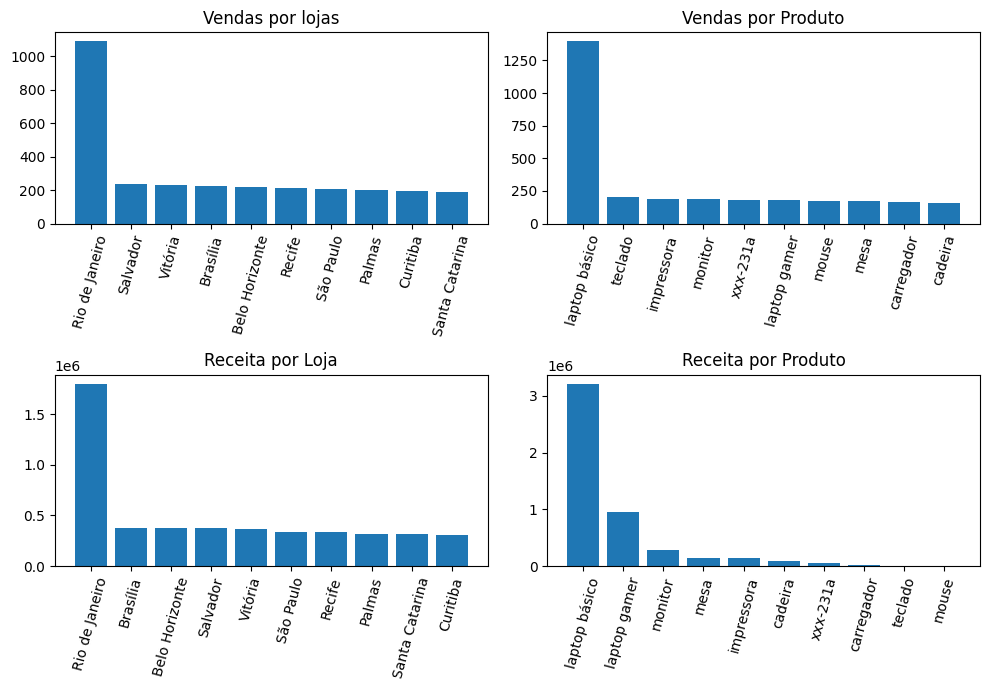

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade')['produto_valor'].count().sort_values(ascending= False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por lojas')
plt.xticks(rotation = 75)


plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto')['produto_valor'].count().sort_values(ascending= False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produto')
plt.xticks(rotation = 75)


plt.subplot(2,2,3)
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending= False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.xticks(rotation = 75)


plt.subplot(2,2,4)
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Produto')
plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()



## Receita por Cliente

In [ ]:
graf_dados = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending = False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

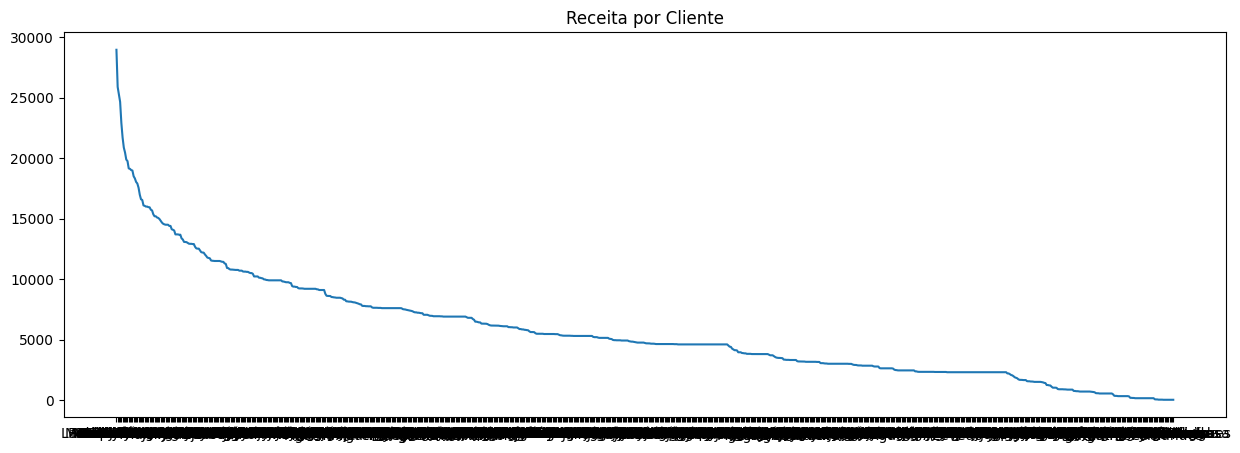

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita por Cliente')
plt.show()

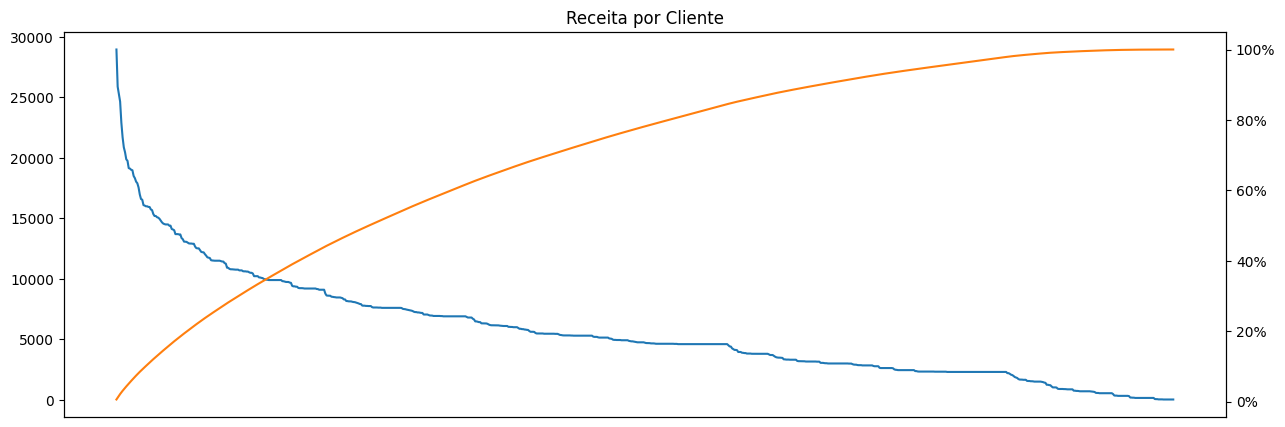

In [ ]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index, graf_dados.values, color = 'C0') # grafico azul
ax2 = ax.twinx()  # fazendo uma cópia do gráfico azul
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1') 
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False) # Retirar a poluição do eixo x
ax.axes.get_xaxis().set_visible(False)
plt.title('Receita por Cliente')
plt.show()

In [ ]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada <0.60].count() / receita_acumulada.count()

0.3170731707317073

## Pareto

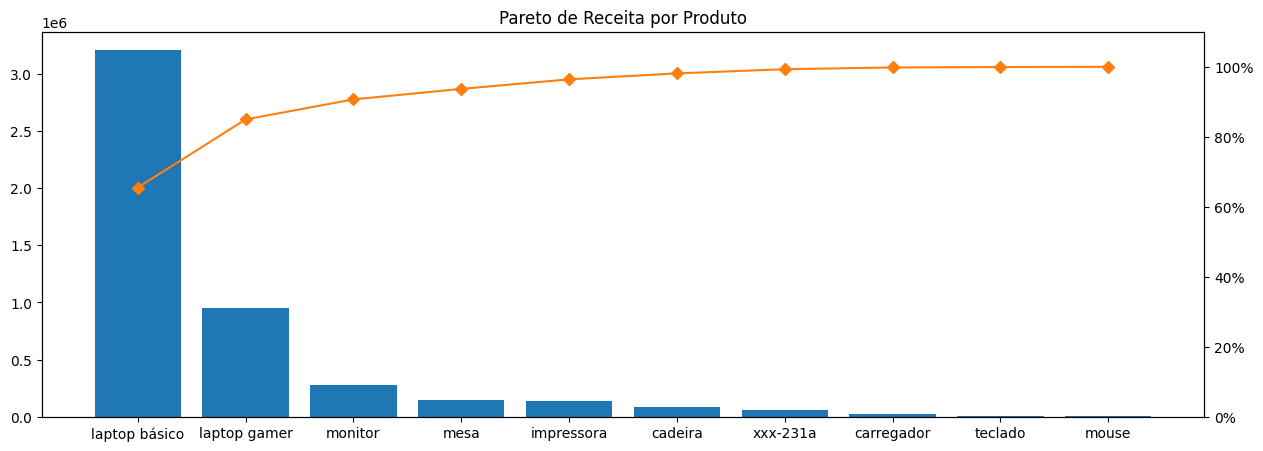

In [ ]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de Receita por Produto')

plt.show()

## Receita combinando produto-loja

In [ ]:
graf_dados = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'loja': [cidade],
            'produto': [produto],
            'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
        }), graf_dados], ignore_index=True)

graf_dados

/tmp/ipykernel_22784/1714701796.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  graf_dados = pd.concat([pd.DataFrame({


,loja,produto,receita
0,Vitória,xxx-231a,7064.9744
1,Vitória,mesa,12040.0000
2,Vitória,cadeira,5400.0000
3,Vitória,carregador,2100.0000
4,Vitória,impressora,8400.0000
...,...,...,...
95,São Paulo,monitor,30000.0000
96,São Paulo,laptop gamer,63600.0000
97,São Paulo,laptop básico,223100.0000
98,São Paulo,teclado,510.0000


In [ ]:
import seaborn as sns

graf_dados = graf_dados.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')
sns.heatmap(graf_dados)


<Axes: xlabel='produto', ylabel='loja'>

In [ ]:
graf_dados

produto,cadeira,carregador,impressora,laptop básico,laptop gamer,mesa,monitor,mouse,teclado,xxx-231a
loja,,,,,,,,,,
Belo Horizonte,6480.0,1800.0,11200.0,232300.0,84800.0,9460.0,25500.0,200.0,450.0,3532.4872
Brasília,6480.0,1350.0,9800.0,250700.0,79500.0,12040.0,13500.0,220.0,540.0,3853.6224
Curitiba,4320.0,1500.0,6300.0,227700.0,37100.0,9460.0,10500.0,280.0,300.0,5780.4336
Palmas,7020.0,1650.0,14000.0,179400.0,79500.0,10320.0,19500.0,240.0,390.0,4817.0280
Recife,8100.0,1650.0,9800.0,195500.0,79500.0,11180.0,22500.0,180.0,660.0,3853.6224
Rio de Janeiro,30240.0,8700.0,50400.0,1189100.0,344500.0,56760.0,96000.0,1280.0,1980.0,18946.9768
Salvador,4320.0,2250.0,9100.0,264500.0,53000.0,13760.0,22500.0,220.0,450.0,5138.1632
Santa Catarina,4320.0,2100.0,7700.0,204700.0,63600.0,6020.0,21000.0,200.0,480.0,3211.3520
São Paulo,6480.0,1500.0,7000.0,223100.0,63600.0,6020.0,30000.0,300.0,510.0,2247.9464


In [ ]:
graf_dados = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'loja': [cidade],
            'produto': [produto],
            'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
        }), graf_dados], ignore_index=True)

graf_dados = graf_dados.sort_values(by='receita', ascending=False)
graf_dados

/tmp/ipykernel_22784/1201886837.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  graf_dados = pd.concat([pd.DataFrame({


,loja,produto,receita
87,Rio de Janeiro,laptop básico,1189100.0
86,Rio de Janeiro,laptop gamer,344500.0
37,Salvador,laptop básico,264500.0
27,Brasília,laptop básico,250700.0
7,Vitória,laptop básico,241500.0
...,...,...,...
29,Brasília,mouse,220.0
39,Salvador,mouse,220.0
59,Santa Catarina,mouse,200.0
69,Belo Horizonte,mouse,200.0


In [ ]:
graf_dados['lojaprod'] = graf_dados['loja'] + '-' + graf_dados['produto']
graf_dados

,loja,produto,receita,lojaprod
87,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
86,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
37,Salvador,laptop básico,264500.0,Salvador-laptop básico
27,Brasília,laptop básico,250700.0,Brasília-laptop básico
7,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
29,Brasília,mouse,220.0,Brasília-mouse
39,Salvador,mouse,220.0,Salvador-mouse
59,Santa Catarina,mouse,200.0,Santa Catarina-mouse
69,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


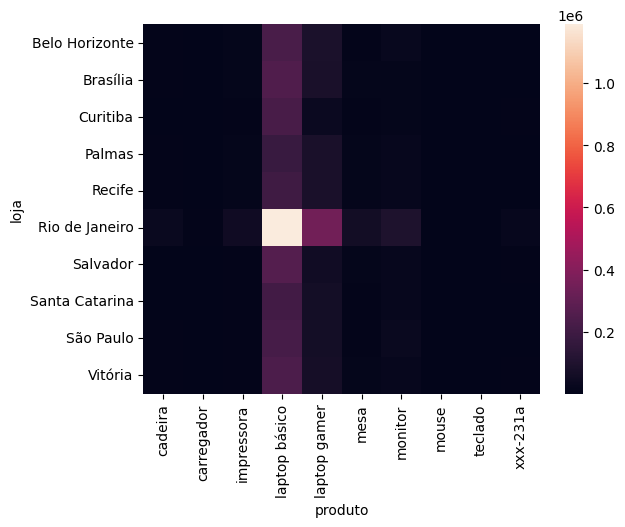

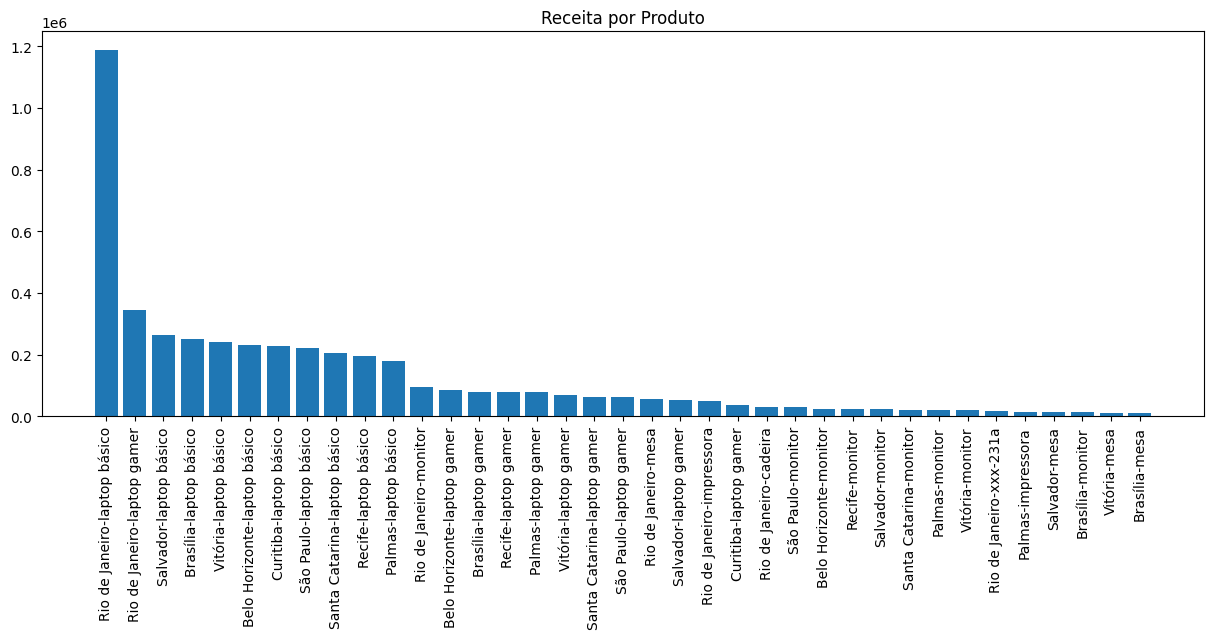

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita > 0.01*graf_dados.receita.max()], graf_dados.receita[graf_dados.receita > 0.01*graf_dados.receita.max()])
plt.xticks(rotation = 90)
plt.title('Receita por Produto')
plt.show()

##### Ploty pode ser interessante

## Análise de Tempo

### Tempo médio pagamento

In [ ]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


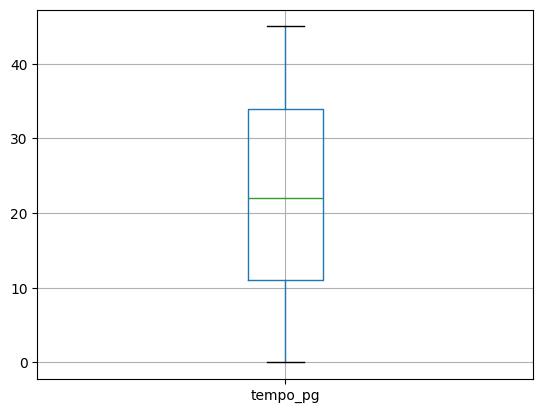

In [ ]:
df.boxplot('tempo_pg')
plt.show()


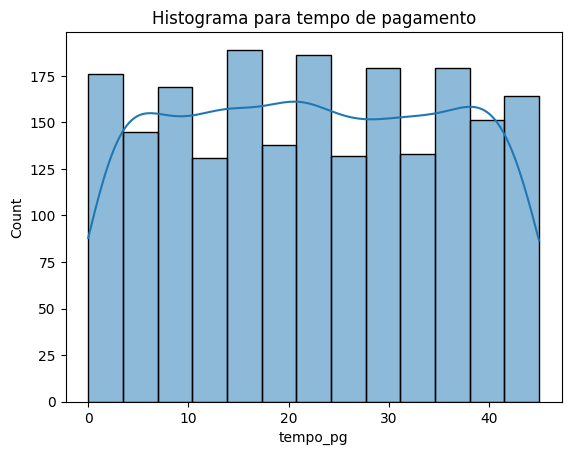

In [ ]:
import seaborn as sns

sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')
plt.show()

In [ ]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

## Tempo de pagamento por cidade e produto

In [ ]:
df.groupby('loja_cidade')['tempo_pg'].mean()

loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

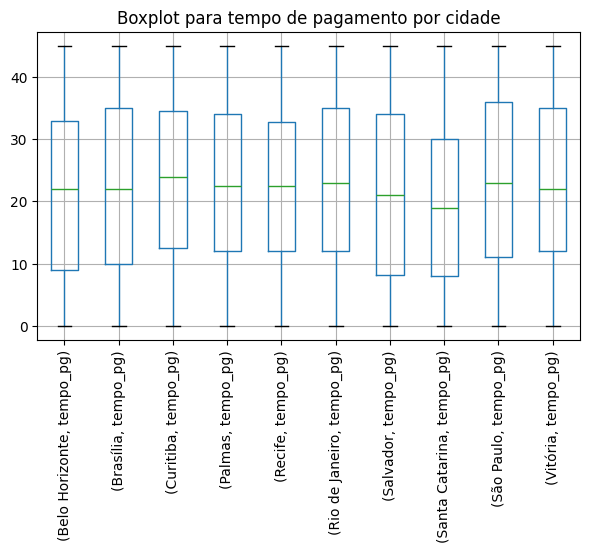

In [ ]:
plt.figure(figsize=(7,4))
df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('produto_produto').pg.mean()

produto_produto
cadeira          0.733766
carregador       0.707317
impressora       0.696335
laptop básico    0.698925
laptop gamer     0.400000
mesa             0.660819
monitor          0.754011
mouse            0.732558
teclado          0.750000
xxx-231a         0.714286
Name: pg, dtype: float64

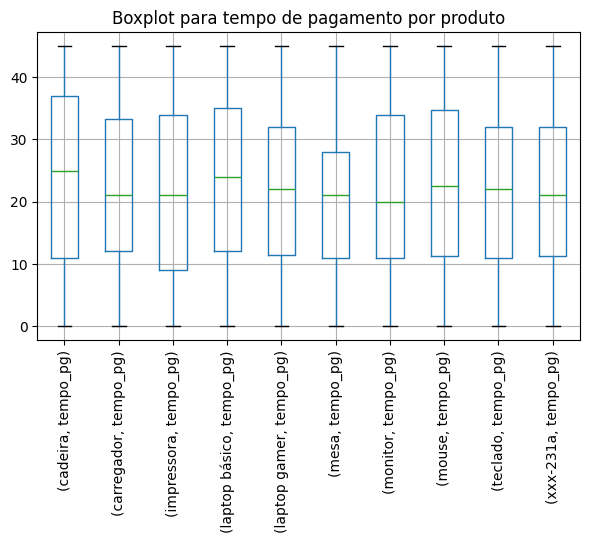

In [ ]:
plt.figure(figsize=(7,4))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

### Tarefa 1

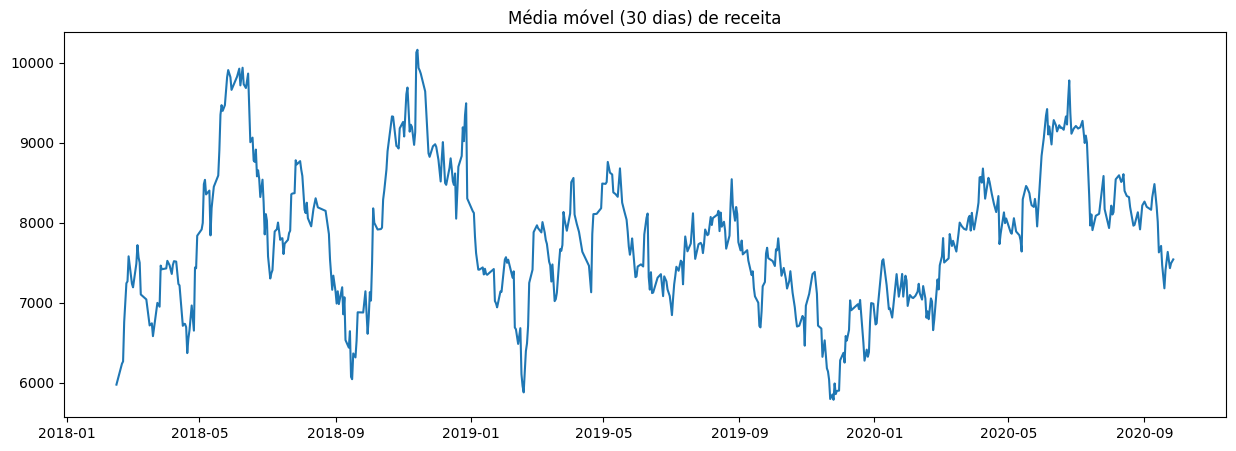

In [ ]:
plt.figure(figsize=(15,5))
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

In [ ]:
df['ano'] = pd.DatetimeIndex(df.dt_venda).year
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,ano
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0,2018
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0,2018
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0,2018
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,2018
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0,2020
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0,2020


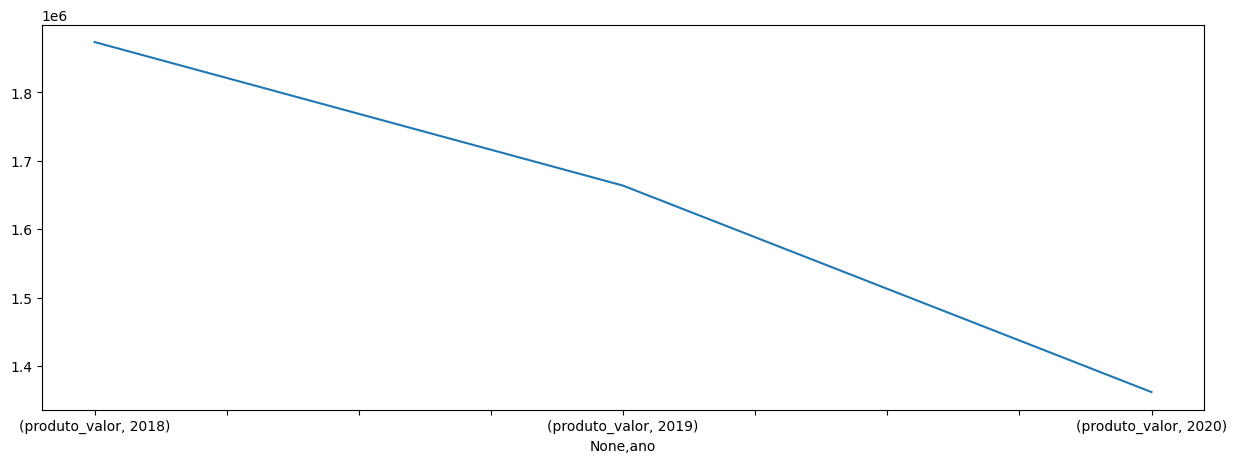

In [ ]:
# tendência de receita anual
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','ano']].groupby(['ano']).sum().unstack().plot(ax=ax)
plt.show()

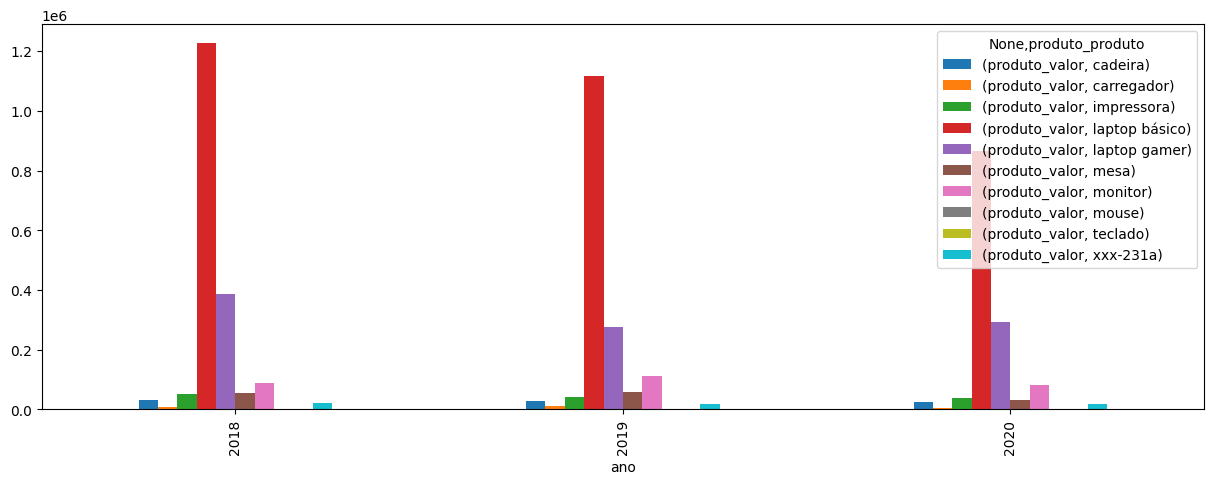

In [ ]:
# tendência por produto
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','produto_produto','ano']].groupby(['ano','produto_produto']).sum().unstack().plot.bar(ax=ax)
plt.show()

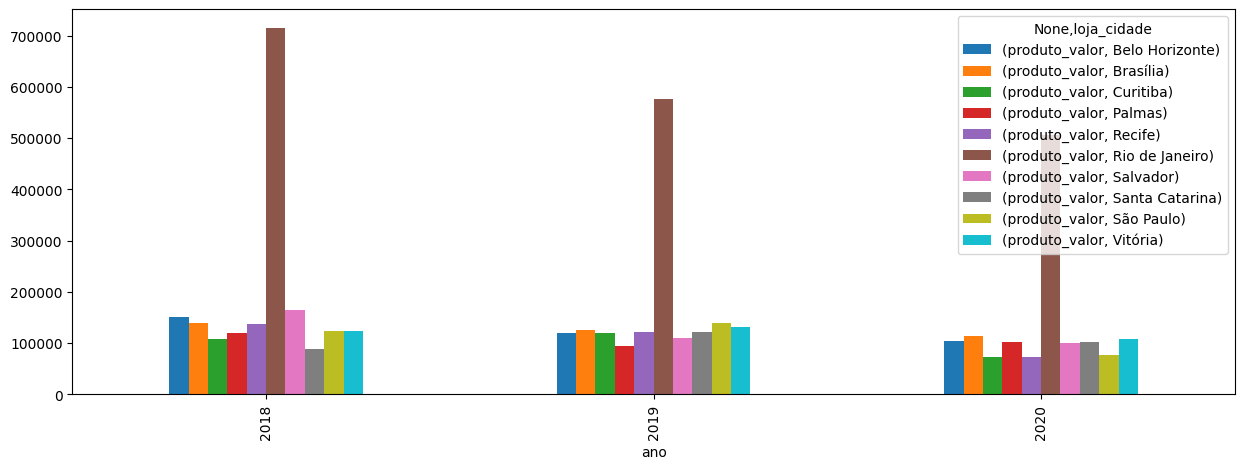

In [ ]:
# tendência por cidade
fig, ax = plt.subplots(figsize=(15,5))
df[['produto_valor','loja_cidade','ano']].groupby(['ano','loja_cidade']).sum().unstack().plot.bar(ax=ax)
plt.show()

## Promoção

In [ ]:
#lendo arquivo CSV
dfPromo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
#definir index
dfPromo = dfPromo.set_index('id_venda')
#join entre df e dfPromo
df = df.join(dfPromo)
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0,2020,0


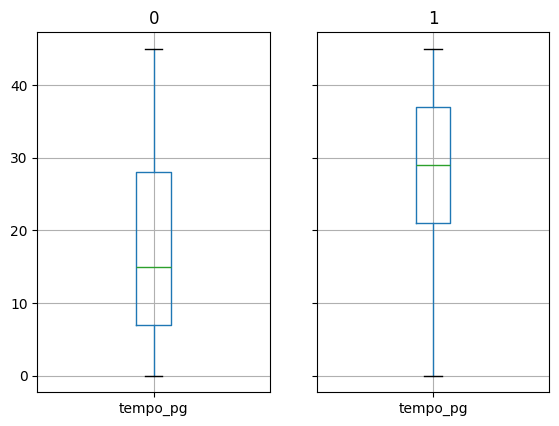

In [ ]:
graf_dados = df[['promoção','tempo_pg']][~df.pg.isnull()]
graf_dados.groupby('promoção').boxplot(column=['tempo_pg'])
plt.show()

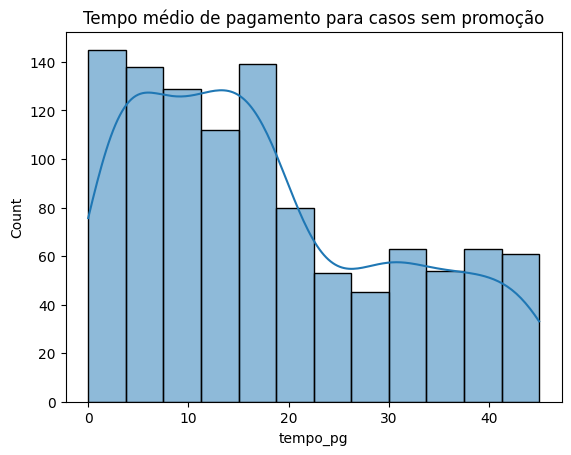

In [ ]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

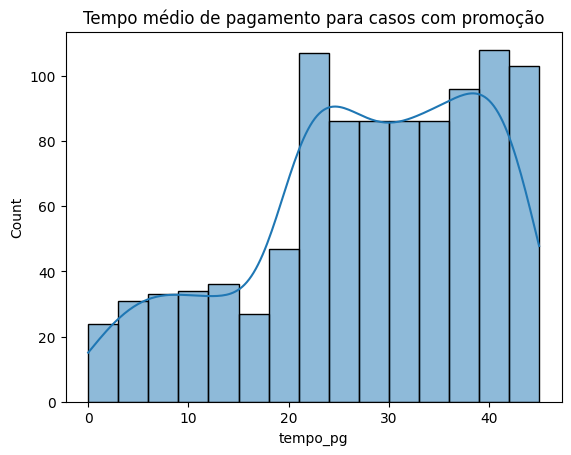

In [ ]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

# Análise de inadimplência

## Inadimplência por Loja

In [ ]:
df.pg.mean() # número de pagamentos concluidos

0.6906666666666667

In [ ]:
df[df.pg==0] # o que gera inadimplência

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,ano,promoção
id,,,,,,,,,,,,,,,,
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0000,NaT,0,NaN,82.0,2018,0
6,52,8,3,2018-01-05,Isabela Gomes,F,1970-05-30,Brasília,laptop básico,2300.0000,NaT,0,NaN,54.0,2018,1
21,270,2,10,2018-01-12,Sem Nome,M,2024-05-14,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0.0,2018,0
22,465,2,3,2018-01-12,Nicole Lima,F,1962-04-17,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,62.0,2018,0
33,459,2,7,2018-01-13,Sophia Melo,F,1997-03-09,Rio de Janeiro,carregador,150.0000,NaT,0,NaN,27.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,764,2,7,2020-09-25,João Rocha,M,1937-10-17,Rio de Janeiro,carregador,150.0000,NaT,0,NaN,86.0,2020,0
2995,6,2,3,2020-09-27,Felipe Almeida,M,1976-10-11,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,47.0,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0000,NaT,0,NaN,38.0,2020,0


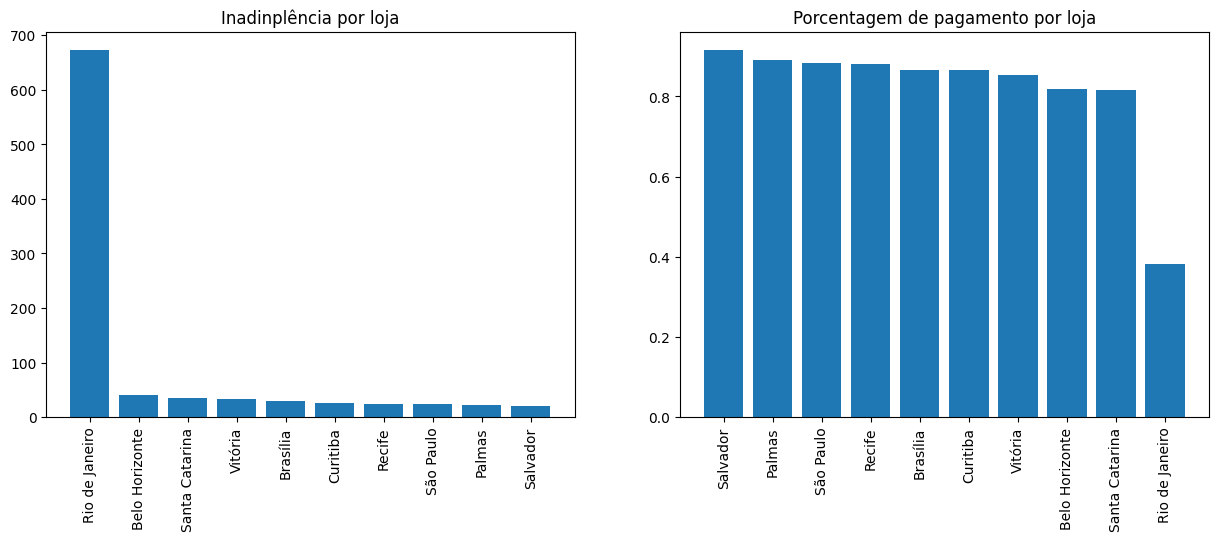

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadinplência por loja')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade')['pg'].mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=90)
plt.show()

In [ ]:
graf_dados

loja_cidade
Salvador          0.914530
Palmas            0.891089
São Paulo         0.884058
Recife            0.881517
Brasília          0.865471
Curitiba          0.865285
Vitória           0.852814
Belo Horizonte    0.819005
Santa Catarina    0.816754
Rio de Janeiro    0.381785
Name: pg, dtype: float64

## Inadimplência por produto

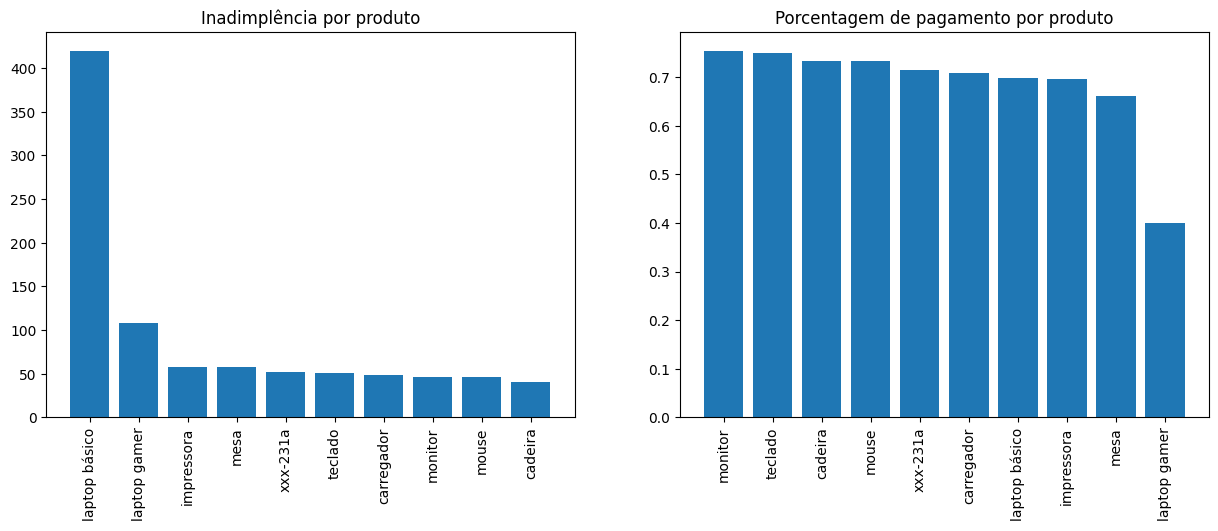

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por produto')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto')['pg'].mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por produto')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# faça analisando a receita para saber se o laptop básico quem está gerando mais prejuízo

## Inadimplência por idade

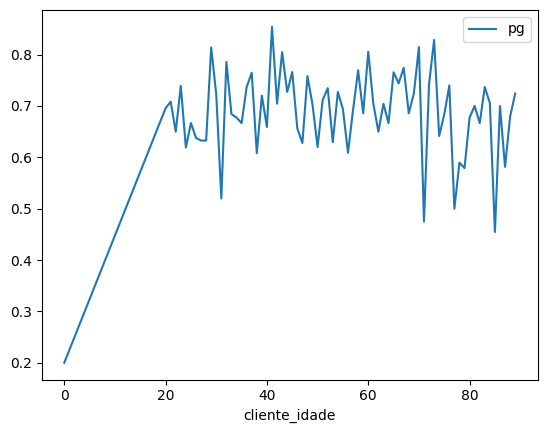

In [ ]:
graf_dados = df[['cliente_idade','pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()
plt.show()

In [ ]:
df[df.cliente_idade < 1]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,ano,promoção
id,,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Sem Nome,M,2024-05-14,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0.0,2018,0
1059,269,5,4,2018-12-15,Sem Nome,F,2024-05-14,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,0.0,2018,0
1745,269,9,3,2019-08-03,Sem Nome,F,2024-05-14,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,0.0,2019,1
1900,269,2,3,2019-09-22,Sem Nome,F,2024-05-14,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,0.0,2019,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2024-05-14,Vitória,laptop básico,2300.0000,NaT,0,NaN,0.0,2020,0


## Mapa de calor de inadimplência

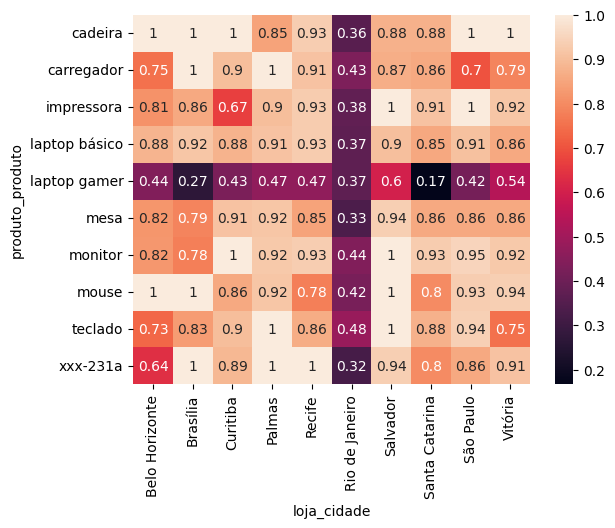

In [ ]:
import seaborn as sns
graf_dados = df.pivot_table(index='produto_produto', columns='loja_cidade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

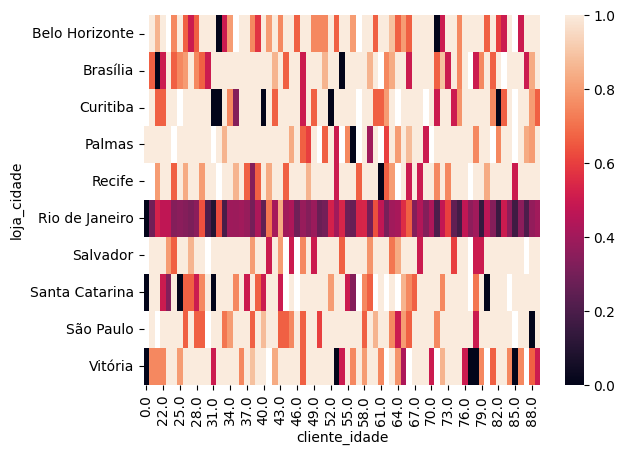

In [ ]:
import seaborn as sns
graf_dados = df.pivot_table(index='loja_cidade', columns='cliente_idade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados)
plt.show()

# Machine Learning

## Alvo

In [ ]:
dfML = df[['cliente_sexo','loja_cidade','produto_produto','produto_valor','cliente_idade','promoção','pg']]
dfML = dfML.replace([' ','-'],'_', regex=True)
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,74.0,0,1
2,F,Palmas,laptop_básico,2300.0,52.0,1,1
3,M,Salvador,cadeira,540.0,61.0,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,82.0,0,0
5,M,Palmas,mouse,20.0,83.0,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,24.0,0,1
2997,F,Brasília,laptop_básico,2300.0,30.0,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,38.0,0,0


## Normalização

In [ ]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.831461,0,1
2,F,Palmas,laptop_básico,0.433962,0.584270,1,1
3,M,Salvador,cadeira,0.101887,0.685393,1,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.921348,0,0
5,M,Palmas,mouse,0.003774,0.932584,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.269663,0,1
2997,F,Brasília,laptop_básico,0.433962,0.337079,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.426966,0,0


## Dados categóricos

In [ ]:
col_cat = ['cliente_sexo','loja_cidade','produto_produto','promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False)
dfML_dummies

,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2997,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
dfML = pd.concat([dfML, dfML_dummies], axis=1) 
dfML = dfML.drop(col_cat, axis=1)
dfML

,produto_valor,cliente_idade,pg,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.831461,1,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,0.433962,0.584270,1,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,0.101887,0.685393,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.433962,0.921348,0,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,0.003774,0.932584,1,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.269663,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2997,0.433962,0.337079,1,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,1.000000,0.426966,0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Dados de treinamento e de teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfML.pg                      # dado de saida, Target, o que deseja atingir
X = dfML.drop(['pg'], axis=1)    # dado de entrada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # test_size coloca que o teste recebe 30% da capacidade

X_new = X.loc[[2997,2998]]
X_new

,produto_valor,cliente_idade,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.337079,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2998,1.000000,0.426966,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


## Regressão Logística

###### saída de dados é binária (0 ou 1)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfML.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfML,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Thu, 16 May 2024   Deviance:                       2677.1
Time:                        13:02:32   Pearson chi2:                 3.01e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))  # gera uma matriz [[Arcetou 180 previsões, ] [errou 75 previsões]]
# coluna [0, 1] para relação a inadimplência [acertou 180 e errou 75]
# linha [0, 1] é o que realmente aconteceu [acertou 180 e errou 115]
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[180 115]
 [ 75 530]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       295
           1       0.82      0.88      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



In [ ]:
model.predict(X_new)

array([1, 0])

## Árvore de Decisão

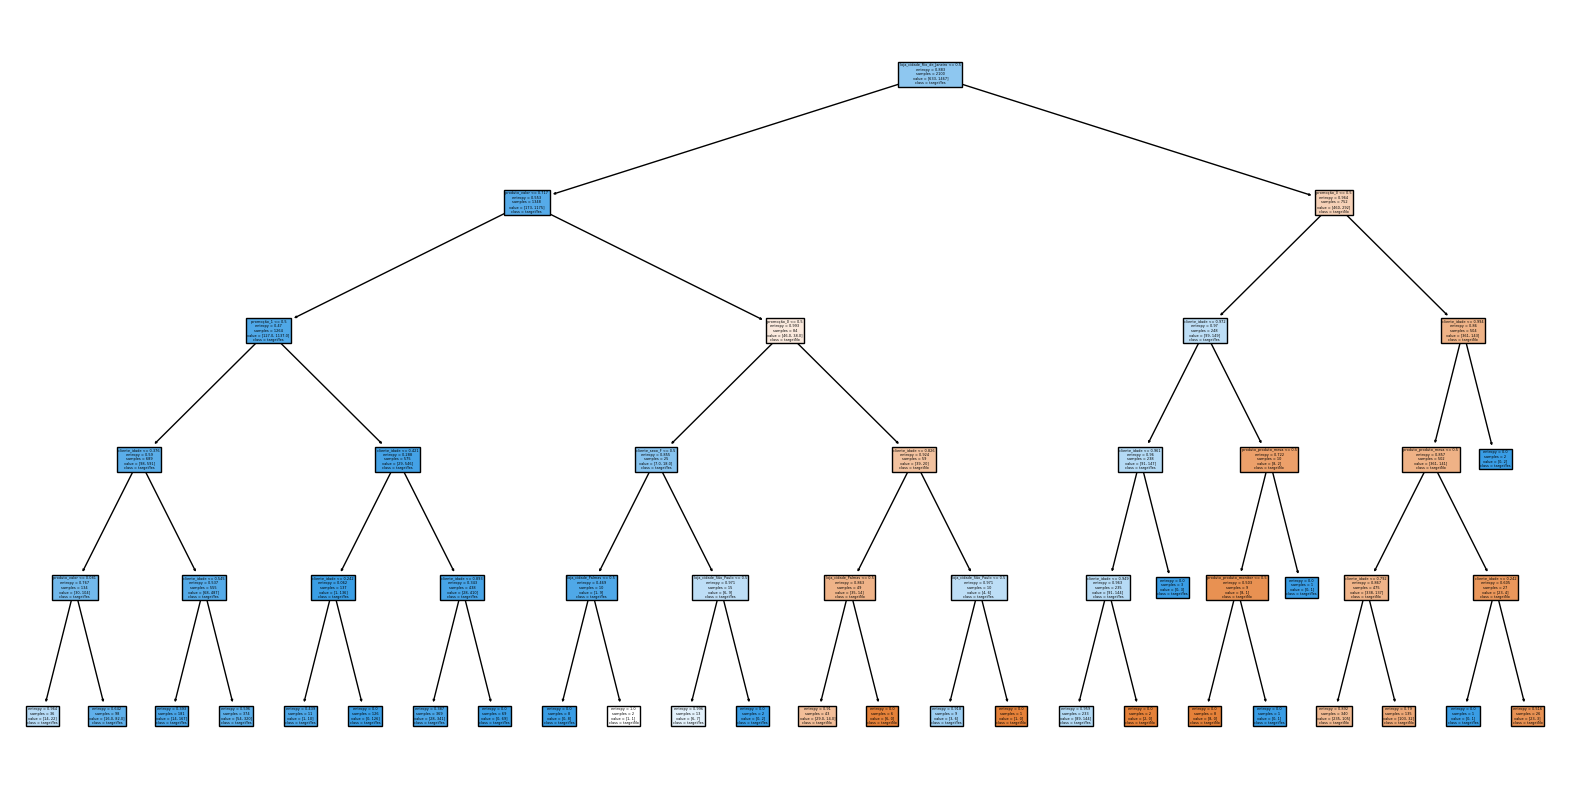

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train,y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['targetNo','targetYes'],
                   filled=True)
plt.show()

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[186 109]
 [ 76 529]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       928
           1       0.85      0.89      0.87      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       295
           1       0.83      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.77      0.75      0.76       900
weighted avg       0.79      0.79      0.79       900



In [ ]:
model.predict(X_new)

array([1, 0])

## Redes Neurais

In [1]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow
tensorflow.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

: 

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=128, epochs=300, verbose=False)

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict_classes(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict_classes(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict_classes(X_test)))

## XGBoost

###### Usada quando está obtendo resultados muito ruins


In [1]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))